In [128]:
from collections import defaultdict
from enum import auto
from enum import Enum
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import tqdm.notebook as tqdm
from graphviz import Digraph

# Finite Markov Decision Processes (MDP)

## Key Concepts

- TODO
  - Returns
  - Value functions
  - Bellman equations

## Definitions

**Agent**: Learner/decision maker.

**Envrionment**: Everything outside of the agent that it interacts with (i.e. anything that cannot be changed arbitrarily by the agent). 

**Action**: Any decision we want the agent to learn how to make.

**State**: Anything we can know that might be useful when choosing an action.

**Reward**: Numerical values - always scalar - from the environment that the agent seeks to maximize over time through its choice of actions.

**Trajectory**: A sequence of actions, states, and rewards that begins like $S_0$, $A_0$, $R_1$, $S_1$, $A_1$, $\dots$

**Markov Decision Process**:

**Finite MDP**: An MDP where the possible state, action, and reward sets ($\mathcal{S}$, $\mathcal{A}$, $\mathcal{R}$) are finite.

**Markov Property**: 

**Reward Hypothesis**: All goals can be described by the maximisation of expected cumulative reward.

**MDP Dynamics**: 

**Transition Graph**:

**State Nodes**: 

**Action Nodes**:

**Return**: 

**Episode**:

**Terminal State**:

**Starting State**:

**Absorbing State**: A state that transitions only to itself and generates only rewards of zero.

**Episodic Task**:

**Continuing Task**:

**Discounted Return**:

**Discount Rate**:

**Value Function**:

**Policy**: A mapping from states to probabilities of selecting each possible action. If the agent is following policy $\pi$ at time $t$, then $\pi(a | s)$ is the probability 

**State Value Function**:

**Monte Carlo methods**:

**Bellman Equation**:

**Partial Order**: A set together with a binary relation indicating that, for certain elements in the set, one of the elements precedes the other in the ordering. The relation must be reflexive, antisymmetric, and transitive. (Not all elements need be comparable)

**Optimal Policy**:

## Notation

$p(s', r | s, a) \doteq \text{Pr}\{S_t = s', R_t = r | S_{t - 1} = s, A_{t - 1} = a\}$: The dynamics function for an MDP. Defines the probability of transitioning to state $s'$ and receiving reward $r$ when taking action $a$ in state $s$.

$q_*(s, a)$: The value of action $a$ in state $s$.

$v_\pi(s)$: The value function of a state s under policy $\pi$.

$v_*(s)$: The value of each state given optimal action selections.

$\pi(a | s)$: The policy; probability of choosing $A_t = a$ at time $t$ given $S_t = s$.

$\mathcal{S}$: Set of all nonterminal states.

$\mathcal{A}(s)$: Set of all actions available in state $s$. Available actions can depend on the current time step: $\mathcal{A}_t(s)$.

$\mathcal{R}$: Set of all rewards, a finite subset of the real numbers $\mathbb{R}$.

$\mathcal{S}$: Set of all nonterminal states. 

$\mathcal{S}^+$: Set of all states plus the terminal state.

## Examples

## Initial Notes

MDPs are a mathematically idealised formalism for sequential decision making.

They involved evaluative feedback and are also associative (choose different actions in different situations). 

Actions influence not just the immediate reward but future situations and therefore future rewards.

### 3.1

An agent interacts with an environment in a sequence of discrete time steps. 

The agent selects actions and the environment responds to the actions, presenting new situations and yielding rewards.

At time step $t$, the agent receives some representation of the environment state, $S_t \in \mathcal{S}$, and selections an action, $A_t \in \mathcal{A}(s)$.

One step later, it receives a numerical rewards, $R_{t + 1} \in \mathcal{R} \subset \mathbb{R}$, and finds itself in a new state, $S_{t + 1}$.

The MDP and agent together give rise to a _trajectory_ that begins like:

$S_0, A_0, R_1, S_1, A_1, R_2, S_2, A_2, R_3, \dots$

Finite MDP: Set of all states, actions and rewards ($\mathcal{S}$, $\mathcal{A}$, $\mathcal{R}$) have a finite number of elements. The random variables $R_t$ and $S_t$ have well defined discrete probability distributions depending only on the preceding state and action. For some $s' \in \mathcal{S}$ and $r \in \mathcal{R}$:

\begin{equation}
    p(s', r | s, a) \doteq P\{S_t = s', R_t = r | S_{t - 1} = s, A_{t - 1} = a\}
\end{equation}

$p$ defines the _dynamics_ of the MDP. It is a probability distribution so the following must hold:

\begin{equation}
    \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s', r | s, a) = 1, \forall s \in \mathcal{S}, a \in \mathcal{A}(s)
\end{equation}

The probability of each possible value for the next state and reward depends only on the immediately preceding state and action. This is best viewed as a restribtion not on the decision process but on the state (i.e. if more information is required about previous time steps, store it in the state). 

Given the dynamics function $p$ you can compute anything you want to know about the environment.

---

_state-transition probabilities_:

$p(s' | s, a) = \sum_{r \in \mathcal{R}} p(s', r | s, a)$

_expected rewards for state-action pairs_: 

$r(s, a) \doteq \mathbb{E}\left[R_t | S_{t - 1}=s, A_{t - 1} = a \right] = \sum_{r \in \mathcal{R}} r \sum_{s' \in \mathcal{S}} p(s', r | s, a)$

_expected rewards for state-action-next-state_: 

\begin{align}
    r(s, a, s') &\doteq \mathbb{E}[R_t | S_{t - 1} = s, A_{t - 1} = a, S_t = s'] \\
                &= \sum_{r \in \mathcal{R}} P(R_t = r | S_{t - 1} = s, A_{t - 1} = a, S_t = s') \\
                &= \sum_{r \in \mathcal{R}} 
                        \frac{P(R_t = r, S_t = s'| S_{t - 1} = s, A_{t - 1} = a)}
                             {P(S_t = s'| S_{t - 1} = s, A_{t - 1} = a)} \\
\end{align}

---

We do not assume that everything in the environment is unknown to the agent - the agent often knows quite a bit about how its rewards are computed as a function of its actions and the states in which they are taken. In some cases, the agent may know everything about how its environment works and still face a difficult reinforcement learning task (e.g. we know the rules of a Rubik's cube, but may still be unable to solve it).

The boundary between agent and environment represents the limit of the agents _absolute control_, not of its knowledge.

MDP framework is a considerable abstraction. It says that whatever the details of the sensory, memory, and control apparatus, and whatever objective one is trying to achieve, any problem of learning goal-directed behaviour can be reduced to three signals passing back and forth between an agent an its environment: one signal to represent the choices made by the agent (the actions), one signal to represent the basis on which the choices are made (the states), and one signal to define the agent's goal (the rewards). 

Selecting a representation for the states and actions is more art than science at this point. This book offers practical advice and examples regarding good ways of representing states and actions, but the primary goal is on general principles for learning how to behave once representations have been selected.

In [2]:
# Example 3.3

states = {"high", "low"}

actions = {
    "high": {"search", "wait"},
    "low":  {"search", "wait", "recharge"}
}

alpha = 0.8   # prob. remain high energy after search
beta  = 0.4   # prob. remain low  energy after search

# transition_probs[current_state][action][new_state]
#     - defines the probability of transitioning to new_state
#       given action is taken in current_state
transition_probs = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
transition_probs["high"]["search"  ]["high"] = alpha
transition_probs["high"]["search"  ]["low" ] = 1 - alpha
transition_probs["high"]["wait"    ]["high"] = 1.0
transition_probs["low" ]["search"  ]["low" ] = beta
transition_probs["low" ]["search"  ]["high"] = 1 - beta
transition_probs["low" ]["wait"    ]["low" ] = 1.0
transition_probs["low" ]["recharge"]["high"] = 1.0

rewards = {
    "can": 1,
    "rescue": -3,
}

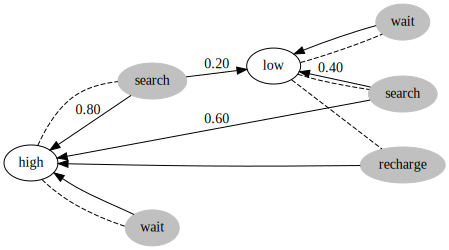

In [3]:
dot = Digraph(graph_attr={"rankdir": "LR"}, strict=True)

# create node for each state
for state in states:
    dot.node(state)

for current_state, state_actions in actions.items():
    for action in state_actions:
        # create node for taking action in current_state
        act_id = current_state + action
        dot.node(act_id, style="filled", color="gray", label=action)
        # create edge between current_state and node for taking action in current_state
        dot.edge(current_state, act_id, arrowhead="none", style="dashed")
        
        # create nodes for each possible new_state after taking action
        # in current_state
        for new_state in states:
            prob = transition_probs[current_state][action][new_state]
            if prob == 0:
                # only show transitions that can occur
                continue
            dot.edge(
                act_id, 
                new_state,
                # only show probabilities if not certain
                label=None if prob == 1 else f"{prob:.2f}"
            )
    
dot

In [4]:
"""
| $s$  | $a$      | $s'$ | $r$ | $p(s', r | s, a)$  |
|------|----------|------|-----|--------------------|
| high | search   | high | 0   | $\alpha/2$         | 
| high | search   | high | 1   | $\alpha/2$         | 
| high | search   | low  | 0   | $(1 - \alpha)/2$   |
| high | search   | low  | 1   | $(1 - \alpha)/2$   |
| high | wait     | high | 0   | 0.5                | 
| high | wait     | high | 1   | 0.5                |
| low  | search   | low  | 0   | $\beta/2$          |
| low  | search   | low  | 1   | $\beta/2$          |
| low  | search   | high | -3  | $1 - \beta$        |
| low  | wait     | low  | 0   | 0.5                |
| low  | wait     | low  | 1   | 0.5                |
| low  | recharge | high | 0   | 1                  |
""";

### 3.2 Goals and Rewards

The agent receives a scalar reward signal - $R_t \in \mathbb{R}$ - at each time step.

The goal is to maximize the total amount of reward it receives, not the immediate reward but the cumulative reward in the long run.

_Reward Hypothesis_: All we mean by goals and purposes can be thought of as the maximization of the expected value of the cumulative sum of a received scalar signal (called reward).

The reward signal is the way to tell the agent _what_ it should be achieving. It is not the place to impart prior knowledge about how an agent should achieve a goal. e.g. A chess-playing agent should be rewarded only for winning, not for achieving subgoals such as taking its opponent's pieces. If achieving these sorts of subgoals were rewarded, then the agent might find a way to achieve them without achieving the real goal. 

### 3.3 Returns and Episodes

In general the aim is to maximize the _expected return_ where return - $G_t$ - is defined as some function of the reward signal.

One such function for the return value, where $T$ is the final step:

\begin{equation}
    G_t \doteq R_{t + 1} + R_{t + 2} + R_{t + 3} + \dots + R_T
\end{equation}

The above function is good for agent-environment interaction that breaks naturally into subsequences called **episodes**. Each episode ends in a special state called the **terminal state**, followed by a reset to a standard **starting state** or to a sample from a standard distribution of starting states. 

Tasks with episodes are called **episodic tasks**.

The time of termination - $T$ - is a random variable that normally varies from episode to episode.

Tasks that go on continually without limit are **continuing tasks** ($T = \infty$).

The above return formulation would be infinite also. This leads to the concept of _discounting_. The agent tries to select actions so that the _sum of discounted rewards_ it receives over the future is maximized.

The agent chooses $A_t$ to maximize the expected **discounted return**:

\begin{align}
    G_t &\doteq R_{t + 1} + \gamma R_{t + 2} + \gamma^2R_{t + 3} + \dots \\
        &= \sum_{k = 0}^{\infty} \gamma^k R_{t + k + 1}
\end{align}

where $\gamma$ is the **discount rate** with $0 \leq \gamma \leq 1$.

This determines the present value of future rewards: a reward received $k$ time steps in the future is worth only $\gamma^{k - 1}$ times what it would be worth if it were received immediately. 

If $\gamma < 1$ the infinite sum has a finite value as long as the reward sequence is bounded (all terms between two values).

If $\gamma = 0$ the agent only maximizes immediate rewards.

As $\gamma$ increases from 0 the agent becomes more farsighted. 

Returns are related to each other:

\begin{align}
    G_t &\doteq R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \dots \\
        &=      R_{t + 1} + \gamma G_{t + 1}
\end{align}

with $G_T \doteq 0$. 

For example, if the reward is a constant $+1$ then the return is:

\begin{equation}
    G_t = \sum_{k = 0}^{\infty} \gamma^k = \frac{1}{1 - \gamma}
\end{equation}

Exercise 3.7: If the maze is solvable - which we assume it is - then the agent's expected return is always 1 and doesn't change with each time step. Therefore there is no goal for the agent to actually escape from the maze. 

### 3.4 Unified Notation for Episodic and Continuing Tasks

The previous section discussed _episodic tasks_ and _continuing tasks_. 

It is useful to establish one notation that can be used for both cases.

---

Episodic tasks are made up of a series of episodes, each of which consists of a finite sequence of time steps. 

The time steps for each new episode start from zero. 

We now index the state $S_{t,i}$ to refer to time step as $t$ in the $i$th episode. 

When discussing episodic tasks, normally have no need to distinguish between different episodes so often the episode index $i$ is omitted.

---

Episodic tasks can use the formulation of return that is a sum of infinite rewards by adding a special _absorbing state_ that transitions only to itself and generates only rewards of zero.

This means we can write:

\begin{equation}
    G_t \doteq \sum_{k=t+1}^{T} \gamma^{k - t - 1} R_k
\end{equation}

### 3.5 Policies and Value Functions

Almost all reinforcement learning algorithms involve estimating _value functions_ - functions of states (or of state-action pairs) that estimate how good it is for the agent to be in a given state (expected return).

The rewards the agent can expect to receive in the future depend on what actions it will take. Therefore value functions are defined with respect to particular ways of acting, called policies. 

A _policy_ is a mapping from states to probabilities of selecting each possible action. 

If the agent following policy $\pi$ at time $t$ then $\pi(a | s)$ is the probability that $A_t = a$ if $S_t = s$. 

Reinforcement learning methods specify how the agent's policy is changed as a result of its experience.



---

The expected reward given the current state $S_t$ is:

\begin{align}
\mathbb{E}_\pi[ R_{t + 1} | S_t = s] 
    &= \sum_r r p(r | s) \\
    &= \sum_{r, a} r p(r | s, a) p(a | s) \\
    &= \sum_a \pi(a | s) \sum_r r p(r | s, a) \\
    &= \sum_a \pi(a | s) \sum_{r, s'} p(r, s' | s, a) r
\end{align}

As a transition graph where there are three possible actions:

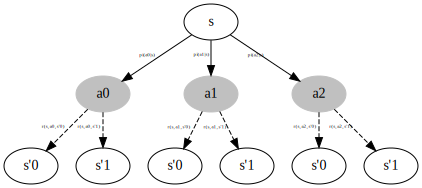

In [5]:
dot = Digraph(edge_attr={"fontsize": "5"})

dot.node("state", label="s")

n_actions = 3
n_states = 2

for act_id in [f"a{act_id}" for act_id in range(n_actions)]:
    dot.node(act_id, style="filled", color="grey")
    dot.edge(
        "state", 
        act_id,
        xlabel=f"pi({act_id}|s)"
    )
    
    for s_id in [f"s'{s_id}" for s_id in range(n_states)]:
        dot.edge(
            act_id, 
            s_id + act_id, 
            xlabel=f"r(s, {act_id}, {s_id})", 
            style="dashed"
        )
        dot.node(s_id + act_id, label=s_id)

dot

--- 

The _state value function_ of a state _s_ under policy _$\pi$_, denoted $v_\pi(s)$ is the expected return when starting in $s$ and following $\pi$ thereafter:

\begin{align}
v_\pi(s) &\doteq \mathbb{E}[G_t | S_t = s] \\
         &= \mathbb{E}\left[ \sum_{k = 0}^{\infty} \gamma^k R_{t + k + 1} \bigg| S_t = s \right]
\end{align}

Similarly, we define the _action-value function for policy $\pi$ as the expected return starting from $s$, taking the action $a$, and thereafter following policy $\pi$:

\begin{align}
q_\pi(s, a) &\doteq \mathbb{E}_\pi[G_t | S_t = s, A_t = a] \\
            &= \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} y^k R_{t + k + 1} \bigg| S_t = s, A_t = a \right]
\end{align}

---

The state-value function can be expressed in terms of the action-value function:

\begin{align}
v_\pi(s) &\doteq \mathbb{E}_\pi[G_t | S_t = s] \\
         &= \mathbb{E}_\pi \left[ \sum_{k = 0}^{\infty} \gamma^k R_{t + k + 1} \bigg| S_t = s \right] \\
         &= \sum_{k = 0}^{\infty} \gamma^k \mathbb{E}_\pi\left[ R_{t + k + 1} \bigg| S_t = s \right] \\
         &= \sum_{k = 0}^{\infty} \gamma^k \sum_a \mathbb{E}_\pi\left[ R_{t + k + 1} \bigg| S_t = s, A_t = a \right] p(a | s) \\
         &= \sum_{k = 0}^{\infty} \gamma^k \sum_a \pi(a | s) q_\pi(a, s) \\
\end{align}

i.e. the state-value function is the sum of the expected value at each step, discounted so that later steps have less weighting. The expected value at each time step is the epxectation where the probability is given by the policy, $\pi$, and the value is given by the action-value function $q_\pi(s, a)$.

The action-value function can be expressed in temrs of the state-value function:

TODO

---

The state-value and action-value functions can be estimated from experience - e.g. agent maintains average of actual returns that have followed that state. Methods that involve averaging over many random samples of actual returns are called **Monte Carlo methods**.

If there are many states it is better to store $v_\pi$ and $q_\pi$ as parameterised functions and adjust the parameters to better match the observed returns. 

#### Bellman Equation for $v_\pi$

A fundamental property of value functions used throughout reinforcement learning and dynamic programming is that they satisfy a recursive relationship. 

For any policy $\pi$ and any state $s$, the following consistency condition holds betweenthe value of $s$ and the value of its possible successor states:

\begin{align}
v_\pi(s) &\doteq \mathbb{E}\pi \left[G_t | S_t = s \right] \\
         &= \mathbb{E}_\pi \left[ R_{t + 1} + \gamma G_{t + 1} | S_t = s \right] \\
         &= \mathbb{E}_\pi \left[ R_{t + 1} | S_t = s \right] + \gamma \mathbb{E}_\pi \left[G_{t + 1} | S_t = s \right] \\
         &= \mathbb{E}_\pi \left[ R_{t + 1} | S_t = s \right] + \gamma \mathbb{E}_\pi \left[ \mathbb{E}_\pi \left[ G_{t + 1} | S_{t + 1} = s' \right ]| S_t = s \right] \\
         &= \mathbb{E}_\pi \left[ R_{t + 1} | S_t = s \right] + \gamma \mathbb{E}_\pi \left[ v_\pi(s') | S_t = s \right] \\
         &= \mathbb{E}_\pi \left[ R_{t + 1} + \gamma v_\pi(s') | S_t = s \right] \\
         &= \sum_{r \in R_{t + 1}, s' \in S_{t + 1}} (r + \gamma v_\pi(s')) p(r, s' | s) \\
         &= \sum_{r \in R_{t + 1}, s' \in S_{t + 1}} (r + \gamma v_\pi(s')) \sum_a p(r, s' | s, a) \pi(a | s) \\
         &= \sum_a \pi(a | s) \sum_{r, s'} p(r, s' | s, a) (r + \gamma v_\pi(s'))
\end{align}

The final expression is really a sum of all values of the three variables $a$, $s'$, $r$. For each triple, we compute its probability $\pi(a | s)p(s', r | s, a)$, weight the quantity in brackets by that probability, then sum over all possibilities to get an expected value. 

The last line is the **Bellman equation for $v_\pi$**.

i.e.

\begin{equation}
\sum_{a, r, s'} \pi(a | s) p(r, s' | s, a) (r + \gamma v_\pi(s'))
\end{equation}

It expresses the relationship between a value of a state and the values of its successor states:

---

The Bellman equation states that the value of the start state must equal the (discounted) value of the expected next state, plus the reward along the way.

---

The value function $v_\pi$ is a unique solution to its Bellman equation.

In [118]:
# Example 3.5, Gridworld
#
# The following performs policy evaluation for the policy that 
# chooses each action from a uniform probability distribution.
#
# It does this using:
#
#     1. Temporal difference
#     2. Analytic solution (system of linear equations)


# 25 states aranged into a 5x5 grid:
#
# |  0 |  1 |  2 |  3 |  4 |
# |  5 |  6 |  7 |  8 |  9 |
# | 10 | 11 | 12 | 13 | 14 |
# | 15 | 16 | 17 | 18 | 19 |
# | 20 | 21 | 22 | 23 | 24 |
states = np.arange(5*5).reshape(5, 5).tolist()


# Four possible moves at each state
class Action(Enum):
    NORTH = auto()
    SOUTH = auto()
    EAST = auto()
    WEST = auto()

    
# Dynamics of the environment
def dynamics(state: int, action: Action) -> Tuple[int, int]:
    if state == 1:
        return 21, 10
    
    if state == 3:
        return 13, 5
    
    if action == Action.NORTH:
        if state - 5 < 0:
            return state, -1
        return state - 5, 0
    
    if action == Action.SOUTH:
        if state + 5 >= 25:
            return state, -1
        return state + 5, 0
    
    if action == Action.EAST:
        if (state + 1) % 5 == 0:
            return state, -1
        return state + 1, 0
    
    if action == Action.WEST:
        if state % 5 == 0:
            return state, -1
        return state - 1, 0
    
    raise ValueError(f"unknown action {action}")


# uniform random policy
def uniform_policy(state: int) -> Action:
    return np.random.choice(Action)

In [276]:
# Computational solution using the temporal difference method
# with cosine decay learning rate

def cosine_lr(lr_min, lr_max, max_step):
    """Returns a func that given a step returns a learning rate with cosine decay."""
    def get_lr(step):
        if step >= max_step:
            return lr_min
        return lr_min + 0.5 * (lr_max - lr_min) * (1 + np.cos(step / max_step * np.pi))
    return np.vectorize(get_lr)

exp_ret = np.zeros(5*5)     # current estimate of the return for a given state 
tot_steps = int(5e6)        # total number of steps to take in the random walk
s = np.random.choice(5*5)   # random starting position

lr_fn = cosine_lr(lr_min=0.0, lr_max=0.25, max_step=tot_steps)

# execute random walk
for step in tqdm.trange(tot_steps):
    s_prime, r = dynamics(s, uniform_policy(s))
    exp_ret[s] += lr_fn(step) * ((r + 0.9*exp_ret[s_prime]) - exp_ret[s])
    visits[s] += 1
    s = s_prime
    
def display(returns):
    """Prints grid showing returns for each state."""
    for row in returns.reshape(5, 5).tolist():
        print("| ", end="")
        for val in row:
            print(f"{val: 2.2f}", end=" |")
        print()
        
display(exp_ret)


|  3.30 | 8.78 | 4.48 | 5.34 | 1.49 |
|  1.53 | 3.02 | 2.29 | 1.92 | 0.57 |
|  0.07 | 0.74 | 0.69 | 0.38 |-0.40 |
| -0.96 |-0.43 |-0.34 |-0.57 |-1.17 |
| -1.86 |-1.34 |-1.23 |-1.40 |-1.95 |


In [277]:
# Analytical solution using system of linear equations
# 25 equations, one for each state, and 25 unknowns (expected returns)
# 
# Many of the states thankfully share the same equation so we can 
# fill in their coefficients and dependent value using a for loop

coefs = np.zeros((25, 25))
deps = np.zeros(25)

gamma = 0.9

# Let rx be the expected return for state x and "rx: f" 
# have two parts. "f" is the xth row of the resulting system
# of linear equations and is derived from the equation for "rx"
#
# r0: 2 = (-4 + 2*gamma)*r0 + gamma*r1 + gamma*r5
coefs[0][0] = (-4 + 2*gamma)
coefs[0][1] = gamma
coefs[0][5] = gamma
deps[0] = 2

# r1: 10 = r1 - gamma*r21
coefs[1][1]  = 1
coefs[1][21] = -gamma
deps[1] = 10

# r2: 1 = (-4 + gamma)*r2 + gamma*r7 + gamma*r3 + gamma*r1
coefs[2][2] = (-4 + gamma)
coefs[2][7] = gamma
coefs[2][3] = gamma
coefs[2][1] = gamma
deps[2] = 1

# r3: 5 = r3 - gamma*r13
coefs[3][3] = 1
coefs[3][13] = -gamma
deps[3] = 5

# r4: 2 = (-4 + 2*gamma)*r4 + gamma*r9 + gamma*r3
coefs[4][3] = gamma
coefs[4][4] = (-4 + 2*gamma)
coefs[4][9] = gamma
deps[4] = 2

# r5, r10, r15: 1 = (-4 + gamma)*rx + gamma*r(x-5) + gamma*r(x+5) + gamma*r(x+1)
for x in [5, 10, 15]:
    coefs[x][x]   = (-4 + gamma)
    coefs[x][x-5] = gamma
    coefs[x][x+5] = gamma
    coefs[x][x+1] = gamma
    deps[x] = 1

# r6,  r7,  r8, 
# r11, r12, r13,
# r16, r17, r18: 0 = -4rx + gamma*r(x-5) + gamma*r(x+5) + gamma*r(x+1) + gamma*r(x-1)
for x in [6, 7, 8, 11, 12, 13, 16, 17, 18]:
    coefs[x][x] = -4
    coefs[x][x-5] = gamma
    coefs[x][x+5] = gamma
    coefs[x][x+1] = gamma
    coefs[x][x-1] = gamma
    deps[x] = 0
    
# r9, r14, r19: 1 = (-4 + gamma)*rx + gamma*r(x-5) + gamma*r(x+5) + gamma*r(x-1)
for x in [9, 14, 19]:
    coefs[x][x]   = (-4 + gamma)
    coefs[x][x-5] = gamma
    coefs[x][x+5] = gamma
    coefs[x][x-1] = gamma
    deps[x] = 1
    
# r20: 2 = (-4 + 2*gamma)*r20 + gamma*r15 + gamma*r21
coefs[20][20] = (-4 + 2*gamma)
coefs[20][15] = gamma
coefs[20][21] = gamma
deps[20] = 2

# r21, r22, r23: 1 = (-4 + gamma)*rx + gamma*r(x-5) + gamma*r(x+1) + gamma*r(x-1)
for x in [21, 22, 23]:
    coefs[x][x]   = (-4 + gamma)
    coefs[x][x-5] = gamma
    coefs[x][x+1] = gamma
    coefs[x][x-1] = gamma
    deps[x] = 1
    
# r24: 2 = (-4 + 2*gamma)*r24 + gamma*r19 + gamma*r23
coefs[24][24] = (-4 + 2*gamma)
coefs[24][19] = gamma
coefs[24][23] = gamma
deps[24] = 2

ret = np.linalg.solve(coefs, deps)

display(ret)

|  3.31 | 8.79 | 4.43 | 5.32 | 1.49 |
|  1.52 | 2.99 | 2.25 | 1.91 | 0.55 |
|  0.05 | 0.74 | 0.67 | 0.36 |-0.40 |
| -0.97 |-0.44 |-0.35 |-0.59 |-1.18 |
| -1.86 |-1.35 |-1.23 |-1.42 |-1.98 |


In [278]:
# Showing the expected return from temporal difference with 
# learning rate annealing to the analytical solution

print("Computational:")
display(exp_ret)
print("\nAnalytical:")
display(ret)
print("\nAbsolute difference:")
display(np.abs(exp_ret - ret))

Computational:
|  3.30 | 8.78 | 4.48 | 5.34 | 1.49 |
|  1.53 | 3.02 | 2.29 | 1.92 | 0.57 |
|  0.07 | 0.74 | 0.69 | 0.38 |-0.40 |
| -0.96 |-0.43 |-0.34 |-0.57 |-1.17 |
| -1.86 |-1.34 |-1.23 |-1.40 |-1.95 |

Analytical:
|  3.31 | 8.79 | 4.43 | 5.32 | 1.49 |
|  1.52 | 2.99 | 2.25 | 1.91 | 0.55 |
|  0.05 | 0.74 | 0.67 | 0.36 |-0.40 |
| -0.97 |-0.44 |-0.35 |-0.59 |-1.18 |
| -1.86 |-1.35 |-1.23 |-1.42 |-1.98 |

Absolute difference:
|  0.01 | 0.01 | 0.05 | 0.02 | 0.00 |
|  0.01 | 0.02 | 0.04 | 0.02 | 0.02 |
|  0.02 | 0.01 | 0.02 | 0.02 | 0.00 |
|  0.01 | 0.00 | 0.01 | 0.01 | 0.01 |
|  0.00 | 0.01 | 0.00 | 0.02 | 0.03 |


### 3.6: Optimal Policies and Optimal Value Functions

Solving a reinforcement learning task means finding a policy that achieves a long of reward over the long run.

Value functions define a partial ordering over policies.

A policy $\pi$ is defined to be better than or equal to a policy $\pi'$ if its expected return is greater than or equal to that of $\pi'$ for all states:

\begin{equation}
    v_{\pi}(s) \geq v_{\pi'}(s), \space \forall s \in \mathcal{S}
\end{equation}

There is at least one **optimal policy** that is better than or equal to all other policies.

All the optimal policies are denoted $\pi_*$ and share the same **optimal state-value function** $v_*$:

\begin{equation}
    v_*(s) \doteq \max_{\pi}v_\pi(s)
\end{equation}

All optimal polocies also share the same **optimal action-value function** $q_*(s, a)$:

\begin{equation}
    q_*(s, a) \doteq \max_\pi q_\pi(s, a)
\end{equation}

The optimal action-value function can be written in terms of the state-value function:

\begin{equation}
    q_*(s, a) = \mathbb{E}[ R_{t + 1} + \gamma v_*(S_{t + 1}) | S_t = s, A_t = a ]
\end{equation}